In [1]:
%matplotlib widget
from main import *
import sympy as sp
from sympy import Heaviside, sin, cos
sp.init_printing()

In [2]:
Vcc = 5

In [3]:
multivibrator = Solver.Circuit("multivibrator")
multivibrator.element(
    Resistor("R", {"V1" : "Vc", "V2" : "Vout"}, R = 50e3),
    OpAmp("Op1", {"V+" : "V+", "V-" : "Vc", "Vop" : "Vout", "Vcc" : Vcc, "Vee" : -Vcc}),
    Resistor("R1", {"V1" : "Vout", "V2" : "V+"}, R = 35e3),
    Resistor("R2", {"V1" : "V+", "V2" : Gnd}, R = 30e3),
    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, C = 10e-9, V0 = 1e-1),
)

{'R': {'name': 'R', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 'Vout'}, 'values': {'R': 50000.0}},
 'Op1': {'name': 'Op1', 'type': 'OpAmp', 'nodes': {'V+': 'V+', 'V-': 'Vc', 'Vop': 'Vout', 'Vcc': 5, 'Vee': -5}, 'values': {'Av': oo}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 'V+'}, 'values': {'R': 35000.0}},
 'R2': {'name': 'R2', 'type': 'Resistor', 'nodes': {'V1': 'V+', 'V2': 0}, 'values': {'R': 30000.0}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 1e-08, 'V0': 0.1}}}

In [4]:
Solver.setMain("multivibrator")
compiled = Solver.compile()

In [5]:
model = solveLaplace(compiled, 3e-3, 1e-5, debugLog = True)

{V1, I2_0, I2_1, I0_1, I1_3, I1_1, I3_0, I1_2, I4_0, V2, I3_1, I0_0, I1_0, V0, I4_1, I1_4}
[Eq(I0_1 + I1_2 + I2_0, 0), Eq(I0_0 + I1_1 + I4_0, 0), Eq(I1_0 + I2_1 + I3_0, 0)]
{'R': {'name': 'R', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 'Vout'}, 'values': {'R': 50000.0}}, 'Op1': {'name': 'Op1', 'type': 'OpAmp', 'nodes': {'V+': 'V+', 'V-': 'Vc', 'Vop': 'Vout', 'Vcc': 5, 'Vee': -5}, 'values': {'Av': inf}}, 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 'V+'}, 'values': {'R': 35000.0}}, 'R2': {'name': 'R2', 'type': 'Resistor', 'nodes': {'V1': 'V+', 'V2': 0}, 'values': {'R': 30000.0}}, 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 1e-08, 'V0': 0.1}}}
{'R': {'V1': V1, 'V2': V0}, 'Op1': {'V+': V2, 'V-': V1, 'Vop': V0, 'Vcc': 5, 'Vee': -5}, 'R1': {'V1': V0, 'V2': V2}, 'R2': {'V1': V2, 'V2': 0}, 'C1': {'V1': V1, 'V2': 0}}
{'R': {'V1': I0_0, 'V2': I0_1}, 'Op1': {'V+': I1_0, 'V-': I1_1, 'Vop': I1_2, 'Vcc': I1_3, 'Vee': I1_4}

In [6]:
print(compiled["nodes"])

Vout = compiled["nodes"]["Vout"]
Vc = compiled["nodes"]["Vc"]

{'Vout': V0, 'Vc': V1, 'V+': V2}


In [7]:
print(model)

[(Interval.Ropen(0, 0.00134521423339844), {I1_0: 0, I1_1: 0, I0_0: -2.33333333333333e-6*exp(2333.33333333333*t), I0_1: 2.33333333333333e-6*exp(2333.33333333333*t), I1_2: -5.66666666666667e-6*exp(2333.33333333333*t), I3_0: 3.33333333333333e-6*exp(2333.33333333333*t), I2_1: -3.33333333333333e-6*exp(2333.33333333333*t), I2_0: 3.33333333333333e-6*exp(2333.33333333333*t), V0: 0.216666666666667*exp(2333.33333333333*t), I4_0: 2.33333333333333e-6*exp(2333.33333333333*t), I3_1: -3.33333333333333e-6*exp(2333.33333333333*t), I4_1: -2.33333333333333e-6*exp(2333.33333333333*t), I1_3: 0, I1_4: 0, V2: 0.1*exp(2333.33333333333*t), V1: 0.1*exp(2333.33333333333*t)}, {('C1', ''), ('R2', ''), ('R', ''), ('R1', ''), ('Op1', 'Amp')}), (Interval.Ropen(0.00134521423339844, 0.00184447937011719), {I1_0: 0, I1_1: 0, I0_0: 0.000146153850495463*exp(-2000.0*t), I0_1: -0.000146153850495463*exp(-2000.0*t), I2_1: 7.69230769230769e-5, I2_0: -7.69230769230769e-5, I3_0: -7.69230769230769e-5, I1_2: 7.69230769230769e-5 + 0

In [8]:
printModel(model, var=t, important={Vout, Vc})

{('C1', ''), ('R2', ''), ('R', ''), ('R1', ''), ('Op1', 'Amp')}
t ∈ Interval.Ropen(0, 0.00134521423339844)
{V1: 0.1*exp(2333.33333333333*t), V0: 0.216666666666667*exp(2333.33333333333*t)}
{V1: 0.100000000000000, V0: 0.216666666666667}
{V1: 2.30769252477316, V0: 5.00000047034184}
-------------------------------------
{('C1', ''), ('R2', ''), ('R', ''), ('R1', ''), ('Op1', 'SatMin')}
t ∈ Interval.Ropen(0.00134521423339844, 0.00184447937011719)
{V1: -5.0 + 7.30769252477316*exp(-2000.0*t), V0: -5.00000000000000}
{V1: -4.50415946350548, V0: -5.00000000000000}
{V1: -4.81732217127120, V0: -5.00000000000000}
-------------------------------------
{('C1', ''), ('Op1', 'SatMax'), ('R2', ''), ('R', ''), ('R1', '')}
t ∈ Interval.Ropen(0.00184447937011719, 0.00234374450683594)
{V1: 5.0 - 7.30769611359116*exp(-2000.0*t), V0: 5.00000000000000}
{V1: 4.81732208155786, V0: 5.00000000000000}
{V1: 4.93269770613425, V0: 5.00000000000000}
-------------------------------------
{('C1', ''), ('R2', ''), ('R', '

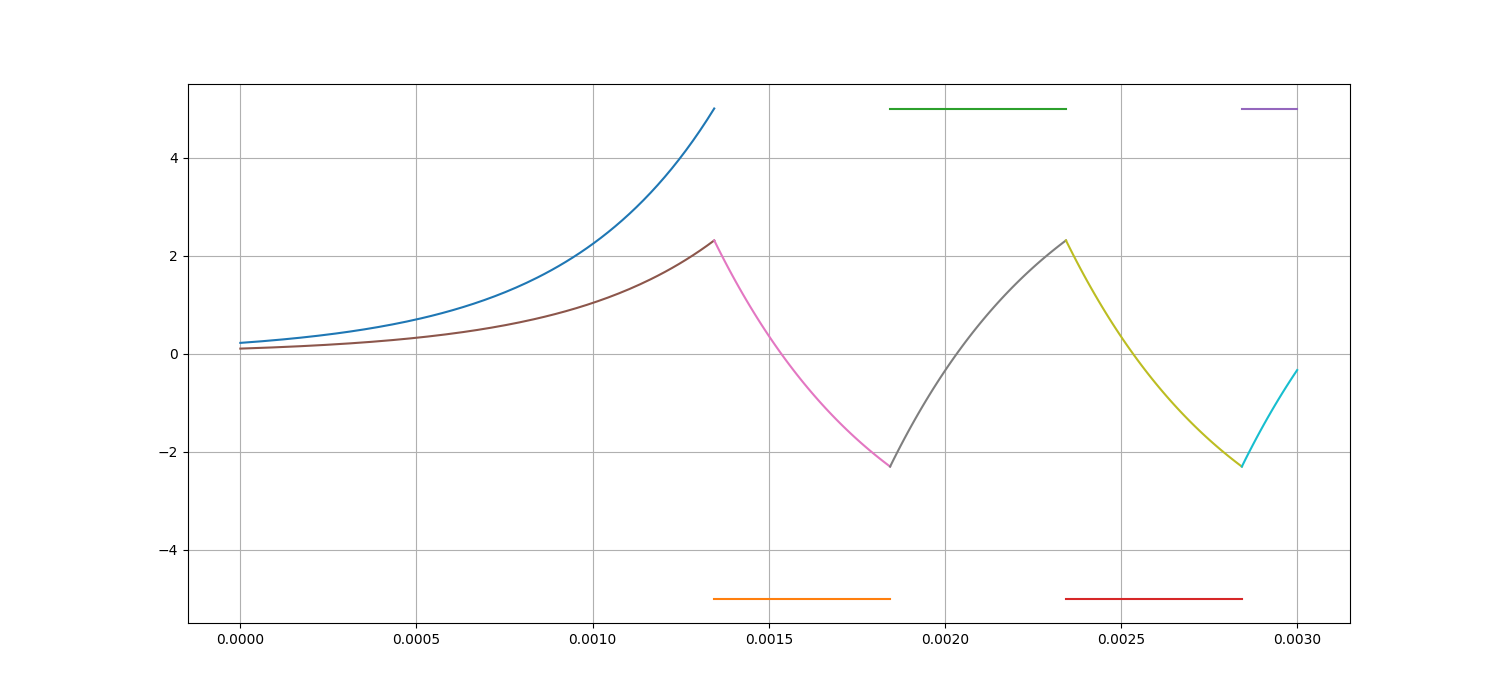

In [9]:
measurments =   [   
                    (Vout, "Vout(t)"),
                    (Vc, "Vc(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 3e-3, 1e-5, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()